<a href="https://colab.research.google.com/github/shrutisingh004/Deep-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Sequential([
    TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(28, 28, 1)),
    TimeDistributed(MaxPooling1D(2)),
    TimeDistributed(Flatten()),
    LSTM(50, return_sequences=False),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 165s 169ms/step - accuracy: 0.6980 - loss: 0.9101 - val_accuracy: 0.9563 - val_loss: 0.1588
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 183s 149ms/step - accuracy: 0.9541 - loss: 0.1544 - val_accuracy: 0.9707 - val_loss: 0.0959
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 152ms/step - accuracy: 0.9688 - loss: 0.1055 - val_accuracy: 0.9782 - val_loss: 0.0801
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 200s 151ms/step - accuracy: 0.9770 - loss: 0.0765 - val_accuracy: 0.9793 - val_loss: 0.0712
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 151ms/step - accuracy: 0.9802 - loss: 0.0655 - val_accuracy: 0.9785 - val_loss: 0.0684
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9755 - loss: 0.0752
Test Accuracy: 0.9785


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


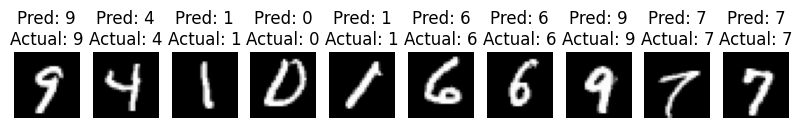

In [ ]:
import matplotlib.pyplot as plt
def show_multiple_predictions(num_images=5):
    indices = np.random.randint(0, len(x_test), num_images)
    plt.figure(figsize=(10, 5))

    for i, idx in enumerate(indices):
        img = x_test[idx].reshape(28, 28)
        true_label = np.argmax(y_test[idx])
        pred_label = np.argmax(model.predict(x_test[idx:idx+1]))

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pred: {pred_label}\nActual: {true_label}')
        plt.axis('off')
    plt.show()

show_multiple_predictions(num_images=10)